# Vorlesung CNN: Downsampling Methoden

Dieses Notebook demonstriert verschiedene Downsampling-Techniken (MaxPool, Average Pool und strided Convolution) auf einem synthetisch erzeugten Kreisbild in Graustufen. Jede Methode reduziert die Auflösung unterschiedlich und illustriert ihren Effekt auf die Feature-Repräsentation.

Schritte:
1. Bild laden und zusammengesetztes Feature-Bild erzeugen
2. In Tensor umwandeln
3. MaxPooling mit Index-Rückgabe
4. Average Pooling
5. Strided Convolution mit benutzerdefinierten Gewichten

In [1]:
# Imports
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pylab as plt
import numpy as np
from PIL import Image, ImageOps

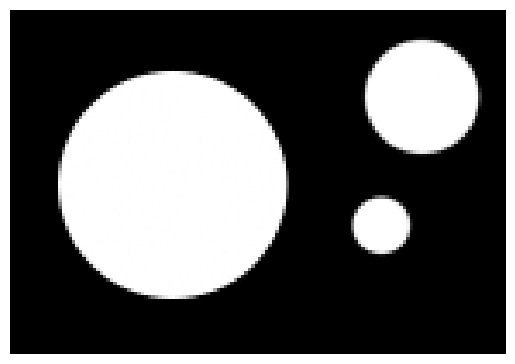

In [2]:
# Bild laden und zusammengesetztes Feature-Bild erzeugen
img = Image.open("SchwarzerKreis.png")  # Stelle sicher, dass die Datei vorhanden ist
img = ImageOps.grayscale(img)
img = ImageOps.invert(img)
feat = Image.new('L', (int(img.width + 0.5*img.width), img.height))
feat.paste(img, (0, 0))
feat.paste(ImageOps.scale(img, 0.5), (img.width, 0))
feat.paste(ImageOps.scale(img, 0.25), (img.width, int(0.5*img.height)))
plt.imshow(feat, cmap='gray')
plt.axis('off')
plt.show()

In [3]:
# In Tensor umwandeln
transform = transforms.ToTensor()
feat = transform(feat)
print("Feature-Tensor Shape:", feat.shape)

Feature-Tensor Shape: torch.Size([1, 100, 144])


In [ ]:
# MaxPooling mit Rückgabe der Indizes
downsample_1_MaxPool = nn.MaxPool2d(2, stride=2, dilation=1, return_indices=True)
downscaling_1, idxList = downsample_1_MaxPool(feat)
print("MaxPool Output Shape:", downscaling_1.shape)
print("Indizes Shape:", idxList.shape)

# Für Darstellung Kanaldimension nach hinten permutieren
downscaling = downscaling_1.clone().permute(1, 2, 0)
result = downscaling.detach().numpy()
plt.imshow(result, cmap='gray')
plt.title('MaxPool Downsampling')
plt.axis('off')
plt.show()

In [ ]:
# Average Pooling
downsample_1_AvgPool = nn.AvgPool2d(2, stride=2)
downscaling = downsample_1_AvgPool(feat)
print("AvgPool Output Shape:", downscaling.shape)

downscaling = downscaling.permute(1, 2, 0)
result = downscaling.detach().numpy()
plt.imshow(result, cmap='gray')
plt.title('Average Pool Downsampling')
plt.axis('off')
plt.show()

In [ ]:
# Strided Convolution mit benutzerdefinierten Gewichten
downsample_2_conv2d = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=2, padding=1,
                                dilation=1, bias=False, padding_mode='replicate')
AssumedWeights = np.array([[-0.125, -0.125, -0.125],
                           [-0.125,  1.000, -0.125],
                           [-0.125, -0.125, -0.125]])
weight_tensor = torch.from_numpy(AssumedWeights).unsqueeze(0).unsqueeze(0)
with torch.no_grad():
    downsample_2_conv2d.weight.copy_(weight_tensor)

print("Conv2d Gewichtsmatrix:\n", downsample_2_conv2d.weight[0,0].numpy())

downscaling_2 = downsample_2_conv2d(feat)
print("Conv2d Output Shape:", downscaling_2.shape)

downscaling = downscaling_2.clone().permute(1, 2, 0)
result = downscaling.detach().numpy()
plt.imshow(result, cmap='gray')
plt.title('Strided Convolution Downsampling')
plt.axis('off')
plt.show()